In [0]:
!nvidia-smi

In [0]:
import numpy as np
import matplotlib.pyplot as plt
!pip install imgaug
from imgaug import augmenters as iaa
from imgaug import parameters as iap
import random
from sklearn.model_selection import train_test_split

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, Dropout, Lambda, MaxPooling2D

Using TensorFlow backend.


In [0]:
y = np.load('y.npy')
X = np.load('X.npy')


In [9]:
print(X.shape, y.shape)

(7728, 60, 80, 3) (7728,)


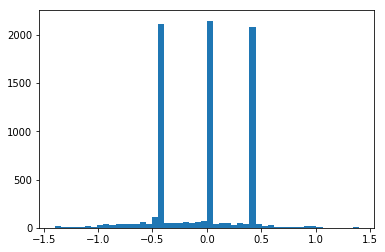

In [10]:
plt.hist(y, 50);

0.0


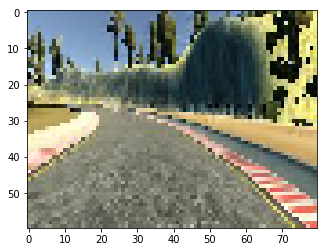

0.25


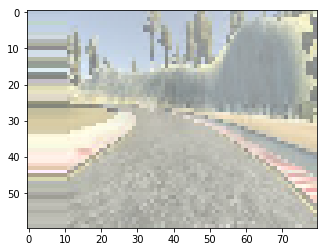

In [12]:
def augment(img, steering_angle):
  # Flip, odbicie lustrzane
  if random.random() > 0.5:
    img = img[:, ::-1, :]
    steering_angle = -steering_angle
  # Blur
  blurer = iaa.GaussianBlur(iap.Uniform(0.1, 1.0))
  img = blurer.augment_image(img)
  # shuffle, losowa zmiana kolorów
  sh = iaa.ChannelShuffle(p=0.5)
  img = sh.augment_image(img)
  #fog
  fog  = iaa.Fog()
  img = fog.augment_image(img)
  #translate, przesuwamy obraz
  tx = random.randint(-20, 20)
  translater = iaa.Affine(translate_px={"x":tx}, mode='edge')
  img = translater.augment_image(img)
  steering_angle += tx*0.025

  return img, steering_angle

plt.imshow(X[0])
print(y[0])
plt.show();

img, angle = augment(X[0], y[0])
plt.imshow(img)
print(angle)
plt.show();

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=42)

In [14]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(6182, 60, 80, 3) (6182,)
(1546, 60, 80, 3) (1546,)


In [15]:
Xgen=[]
ygen=[]
for i in range(X_train.shape[0]):
  img, angle = augment(X[i], y[i])
  Xgen.append(img)
  ygen.append(angle)

Xgen = np.array(Xgen)
ygen = np.array(ygen)
print(Xgen.shape, ygen.shape)
 

(6182, 60, 80, 3) (6182,)


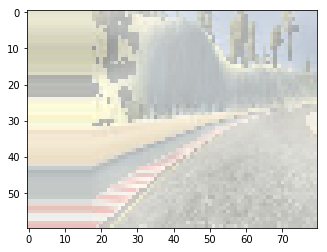

In [16]:
plt.imshow(Xgen[0])

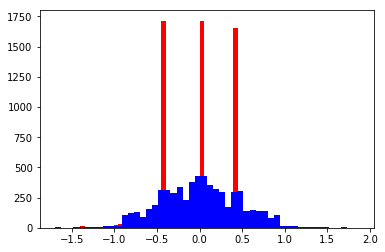

In [17]:
plt.hist(y_train, 50, facecolor='red');
plt.hist(ygen, 50, facecolor='blue');

In [19]:
def myModel(input_shape):
  model = Sequential([
      Lambda(lambda x: (x-128.0)/255.0, input_shape=input_shape, name='normalize'),
      Conv2D(64, (3,3), activation='relu'),
      Conv2D(32, (3,3), activation='relu'),
      Conv2D(16, (3,3), activation='relu'),
      Conv2D(8, (3,3), activation='relu'),
      Flatten(),
      Dense(512),
      Dense(512),
      Dense(16),
      Dense(1)
  ])
  return model
model = myModel(X[0].shape)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalize (Lambda)           (None, 60, 80, 3)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 58, 78, 64)        1792      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 56, 76, 32)        18464     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 54, 74, 16)        4624      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 52, 72, 8)         1160      
_________________________________________________________________
flatten_2 (Flatten)          (None, 29952)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               15335936  
__________